__DSC 478__

__Jonathan Lynch__

# Assignment 3 - Part 1:

## Regression:

__Import libraries and read in file:__

In [282]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
import math
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from numpy import *


%cd "/Users/jonathanlynch/Desktop/DSC 478"

data = pd.read_csv('communities.csv')

/Users/jonathanlynch/Desktop/DSC 478


__Set view option to display all columns:__

In [2]:
pd.set_option('display.max_columns', None)
data.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


__Look at the data types:__

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

## A: Preprocess the data, separate the target attribute for regression, and display basic statistics for each of the numeric variables in the data set :

__Convert variable OtherPerCap to a float, and replace null value/question mark with variable mean:__

In [4]:
data = data.replace({'?': np.nan})
data = data.astype({'OtherPerCap': 'float'})
data['OtherPerCap'].fillna(data['OtherPerCap'].mean(),inplace=True)

__Separate the target attribute (ViolentCrimesPerPop) and predictive variables for regression:__

In [5]:
x = data.iloc[:,2:99]  # remove state and community name from predictive variables (as description mentions these are not treated as predictive)
x.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [6]:
y = data['ViolentCrimesPerPop']  # isolate target variable
y.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

__Look at the descriptive statistics for numerical variables:__

In [7]:
data.iloc[:, 2:100].describe() 

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,0.440597,0.461244,0.434453,0.487568,0.494273,0.487748,0.610918,0.620657,0.664032,0.582884,0.501449,0.526690,0.036294,0.249995,0.030060,0.320211,0.360622,0.399077,0.427879,0.181364,0.182126,0.184774,0.182879,0.785903,0.150587,0.267608,0.251891,0.462101,0.494428,0.404097,0.562598,0.186264,0.495186,0.314694,0.076815,0.719549,0.548686,0.204529,0.433335,0.494178,0.264478,0.243059,0.264689,0.263490,0.268942,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.190960,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,0.175457,0.182460,0.175437,0.175170,0.183607,0.154594,0.201976,0.206353,0.218749,0.191507,0.168612,0.175241,0.108671,0.229946,0.087189,0.219088,0.210924,0.201498,0.194970,0.235792,0.236333,0.236739,0.234822,0.226869,0.219716,0.196567,0.190709,0.169551,0.157924,0.189301,0.197087,0.209956,0.172508,0.255182,0.

The above descriptive statistics show the mean, median, and standard deviation for all numeric variables in this data set (state and community name are not included as they are categorical variables). The minimum and maximum is also shown, along with the first quartile (Q1/25th percentile) and third quartile (Q3/75th percentile). The total count is shown as well.

## B: Perform standard linear regression, compute RMSE on the training data, display the obtained regression coefficients (weights), plot the correlation between the predicted and actual values of the target attribute, & perform 10-fold cross-validation:

__Convert predictive variables (x) and target variable (y) to arrays:__

In [8]:
x_array = np.array(x)
y_array= np.array(y)

__Add a column of 1s for x0 in x_array:__

In [9]:
x_array = np.array([np.concatenate((v,[1])) for v in x_array])

__Standard linear regression using the implementation for Ch. 8 of MLA:__

In [191]:
# create regression function to return weights:
def standRegres(xArr, yArr):
    xMat = np.matrix(xArr) ; yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws

__Get weights & predictions, and look at a few of them:__

In [454]:
std_linear = standRegres(x_array, y_array)  # weights

xMat = mat(x_array)
yMat = mat(y_array)
yHat = xMat*std_linear  # predictions

print('Look at some of the weights:')
print(std_linear[:8])
print()
print('Look at some of the predictions:')
print(yHat)

Look at some of the weights:
[[ 0.13110807]
 [-0.0314115 ]
 [ 0.20990967]
 [-0.04053516]
 [-0.01388929]
 [ 0.05897268]
 [ 0.12339902]
 [-0.2226216 ]]

Look at some of the predictions:
[[0.16551838]
 [0.29062973]
 [0.38367799]
 ...
 [0.40142767]
 [0.16882645]
 [0.37326947]]


__Compute RMSE value on the full training data:__

In [231]:
# sum of squared errors
yHatT = yHat.T
err = abs(yHatT - y_array)
total_error = np.dot(err,err.T)

# compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print('RMSE:')
print(rmse_train)

RMSE:
[[0.12888961]]


__Plot the correlation between the predicted and actual values of the target attribute:__

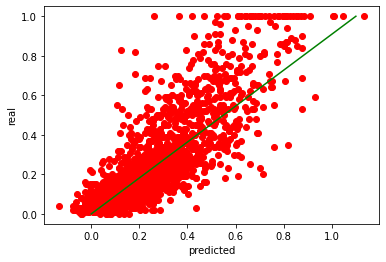

In [220]:
pl.plot(yHat, y_array,'ro')
pl.plot([0,1.1],[0,1], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

__Create linear regression model & train the model on the full dataset using sklearn.linear_model (to verify above results):__

In [232]:
model = LinearRegression()
model.fit(x_array, y_array)

LinearRegression()

In [233]:
# look at the predictions for the first 10 instances:
print(model.predict(x_array[:10]))

[ 0.16551838  0.29062973  0.38367799  0.32270857 -0.02129155  0.23017938
  0.08800201  0.4423392   0.23747971  0.00526097]


__Compute RMSE value on the full training data:__

In [234]:
# predictions:
prediction = model.predict(x_array)

# constuct a vector of errors:
errors = abs(prediction - y_array)

# look at errors of the first 10 predictions:
print(errors[:10])

[0.03448162 0.37937027 0.04632201 0.20270857 0.05129155 0.09017938
 0.05800201 0.1076608  0.29252029 0.14473903]


In [235]:
# dot product of error vector with itself to get sum of squared errors:
total_error = np.dot(errors, errors)

# compute RMSE:
rmse = np.sqrt(total_error/len(prediction))
print('RMSE rounded to four decimal places: {}'.format(round(rmse,4)))

RMSE rounded to four decimal places: 0.1289


__Look at the regression coefficients (weights):__

In [228]:
# view the regression coefficients:
print ('Regression Coefficients: \n', model.coef_)

Regression Coefficients: 
 [ 2.34777719e-01 -2.19061702e-02  2.24909286e-01 -3.34908376e-02
 -1.59197248e-02  3.10727879e-02  1.68322107e-01 -2.23417394e-01
 -1.89869444e-01  2.81064250e-02 -4.08610370e-01  4.99088409e-02
 -2.37887042e-01 -1.68296450e-01  4.20706997e-02 -1.91925998e-01
  1.30630264e-01  3.26631318e-02 -9.80807454e-02  2.99091761e-01
  2.27510323e-02 -2.19491180e-01 -2.79632725e-02 -4.20514203e-02
  2.43889338e-02  3.98196787e-02  2.58506185e-02  1.52915848e-01
 -1.93065882e-01 -6.17929776e-02  2.24377809e-02  1.25844181e-01
 -2.66606365e-03  2.53929046e-01 -3.36731775e-02 -2.17009124e-02
  5.78452997e-01  2.26737242e-01  2.81570170e-01 -7.88430405e-01
 -1.70583283e-01  5.73968262e-03 -3.01628754e-01 -2.06396699e-02
  1.45667189e-02  4.52952343e-02 -1.88198046e-01 -1.78144100e-01
  1.13000728e-01 -1.28831824e-01  2.05221122e-02  5.17112649e-02
 -5.13863039e-02 -6.07915592e-03 -7.56788655e-02 -1.06867390e-01
  2.54147955e-01 -8.76783156e-02 -5.52385405e-02 -2.01932165e-0

__Plot regression coefficients:__

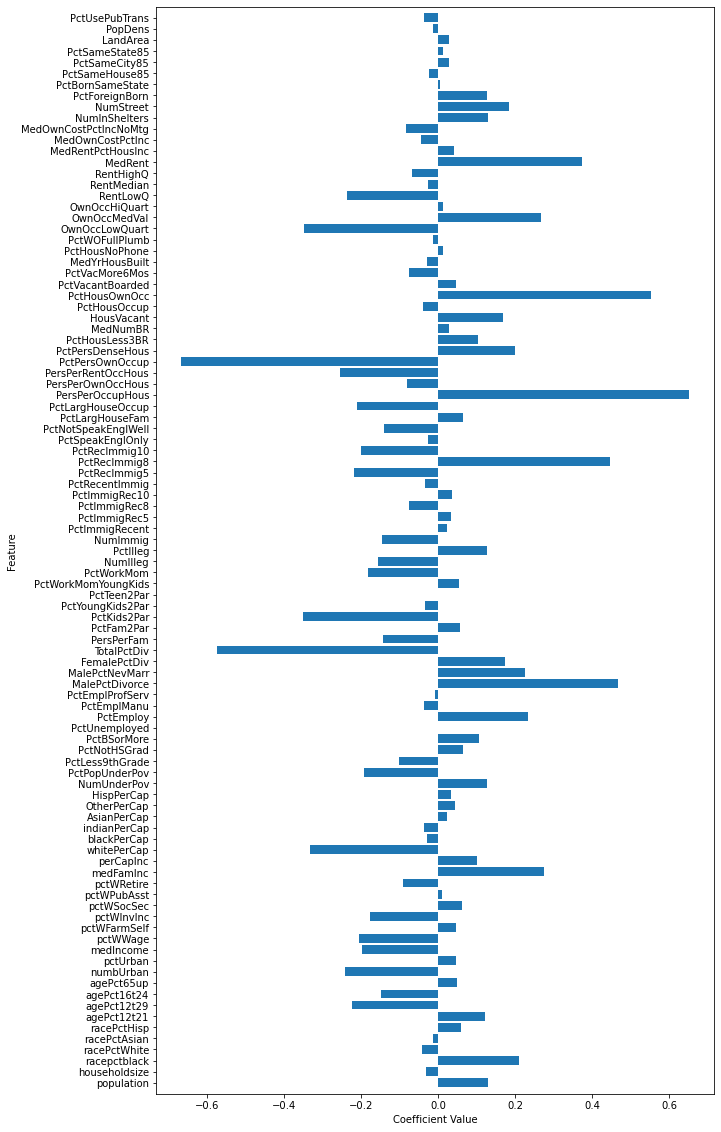

In [15]:
# plot the regression coefficients:
def plot_coefficients(model, n_features, feature_names):
    pl.figure(figsize=(10,20))
    pl.barh(range(n_features), model.coef_[:-1], align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

plot_coefficients(model, len(x.columns), x.columns)

__Compute RMSE using 10-fold cross-validation:__

In [17]:
n = 10

kf = KFold(n_splits=n)
kf.get_n_splits(x_array)

xval_err = 0
for train, test in kf.split(x_array):
    model.fit(x_array[train],y_array[train])
    p = model.predict(x_array[test])
    e = p-y_array[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x_array[test]))
       
rmse_10cv = xval_err/n

__Compare RMSE on full training data to RMSE using 10-fold cross-validation:__

In [18]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training/full dataset: %.4f' %rmse)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training/full dataset: 0.1289
RMSE on 10-fold CV: 0.1359


## C: Feature selection: write a script that returns the optimal percentage of the most informative features. Using 5-fold cross-validation on the training data, find the most informative variables & their weights; plot the model's mean absolute error values on cross-validation relative to the percentage of selected features:

__Find the best percentile of features using cross-validation:__

In [489]:
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
    x_train_fs = fs.fit_transform(x, y)
    scores = model_selection.cross_val_score(model, x_train_fs, y, cv=5, scoring='neg_mean_absolute_error')
    print (i, scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features: {0}%".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = round(percentiles[optimal_percentile[0]]*len(x.columns)/100)
print ("Optimal number of features: {0}".format(optimal_num_features), "\n")

1 -0.11407909224209818
6 -0.10115189540032907
11 -0.10108738571229887
16 -0.10104480961876863
21 -0.09886424513530559
26 -0.09743942708040952
31 -0.09646160050491895
36 -0.09569677985937057
41 -0.0958121897628663
46 -0.09641184981816635
51 -0.0965548557695644
56 -0.09686777875809341
61 -0.09755670361427435
66 -0.0977916033055806
71 -0.09809307676734698
76 -0.09801318802484368
81 -0.09767552852049843
86 -0.09712189615931899
91 -0.09745502725800816
96 -0.09686695744546102
7
Optimal percentile of features: 36% 

Optimal number of features: 35 



The best percentile of features is 36%, meaning that the 35 most informative variables (based on the absolute value of their coefficients) should be selected to be included in a simple linear regression model.

__List most informative variables & their weights:__

In [490]:
dic = {}
for i in range(97):
    dic[x.columns[i]] = model.coef_[i]

coeffs = []
for i in range(97):
    coeffs.append(model.coef_[i])

coeffs_sorted = []
for coeff in coeffs:
    coeffs_sorted.append(abs(coeff))

coeffs_sorted.sort()

coeffs_sorted = coeffs_sorted[-35::]

for (key, value) in dic.items():
    if abs(value) in coeffs_sorted:
        print(key, ':  ', round(value,4))

racepctblack :   0.2099
agePct12t29 :   -0.2226
agePct16t24 :   -0.1475
numbUrban :   -0.2424
medIncome :   -0.1969
pctWWage :   -0.2061
pctWInvInc :   -0.1772
medFamInc :   0.2746
whitePerCap :   -0.3315
PctPopUnderPov :   -0.1913
PctEmploy :   0.235
MalePctDivorce :   0.4668
MalePctNevMarr :   0.2263
FemalePctDiv :   0.1746
TotalPctDiv :   -0.5752
PersPerFam :   -0.142
PctKids2Par :   -0.3511
PctWorkMom :   -0.1822
NumIlleg :   -0.1546
NumImmig :   -0.1443
PctRecImmig5 :   -0.2182
PctRecImmig8 :   0.4458
PctRecImmig10 :   -0.2
PctLargHouseOccup :   -0.2101
PersPerOccupHous :   0.6513
PersPerRentOccHous :   -0.2538
PctPersOwnOccup :   -0.6663
PctPersDenseHous :   0.201
HousVacant :   0.1683
PctHousOwnOcc :   0.5539
OwnOccLowQuart :   -0.3469
OwnOccMedVal :   0.2678
RentLowQ :   -0.237
MedRent :   0.3747
NumStreet :   0.1835


__Plot percentile of features vs cross-validation scores (neg mean absolute error):__

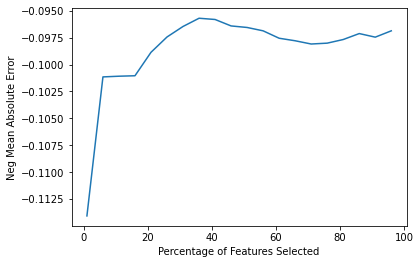

In [21]:
pl.figure()
pl.xlabel("Percentage of Features Selected")
pl.ylabel("Neg Mean Absolute Error")
pl.plot(percentiles, results)

The best percentage of features to include in a linear regression model predicting per capita violent crimes (dependent variable) is 36% based on the negative mean absolute error values obtained during 5-fold cross-validation performed at each percentile (1-100 with a step of 5) in the feature selection process. 

__Perform linear regression with a subset of best features:__

In [501]:
# calculating cross-validation RMSE using the 35 best features:

fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 36)
x_train_fs = fs.fit_transform(x, y)

n = 10

kf = KFold(n_splits=n)
kf.get_n_splits(x_train_fs)

xval_err = 0
for train, test in kf.split(x_train_fs):
    model.fit(x_train_fs[train],y_array[train])
    p = model.predict(x_train_fs[test])
    e = p-y_array[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x_train_fs[test]))
       
rmse_10cv = xval_err/n

print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on 10-fold CV: 0.1374


The cross validation root mean square error of the linear regression model with a subset of the 35 best features is 0.1374. This is relatively similar to the cross-validation root mean square error of 0.1359 from the linear regression model including all features as predictors. 

## D: Ridge Regression and Lasso Regression: perform systematic model selection to identify the optimal alpha parameter. Create a function that takes as input the data and target variable, the parameter to vary and a list of its values, the model to be trained, and any other relevant input needed. Plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data & discuss results:

__Split the data into training and test sets:__

In [94]:
train, test = train_test_split(data, test_size = 0.2, shuffle = True)

train_x = train.iloc[:,2:99]
train_y = train['ViolentCrimesPerPop']

test_x = test.iloc[:, 2:99]
test_y = test['ViolentCrimesPerPop']

__Convert to arrays:__

In [95]:
train_x_array = np.array(train_x)
train_y_array = np.array(train_y)

test_x_array = np.array(test_x)
test_y_array = np.array(test_y)

__Create function to identify optimal alpha parameter for ridge regression and lasso regression models:__

In [434]:
def calc_params(X, y, model, param_values, param_name, K):
    
    print('{} Regression:'.format(model))
    print(param_name + '  RMSE_train\t RMSE_cv\n')
    
    # initialize training rmse and cv-rmse empty arrays
    t_rmse = np.array([])
    cv_rmse = np.array([])
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set model parameters
        model.set_params(**{param_name:param_value})
        
        # computing the RMSE on training data
        model.fit(X,y)
        p = model.predict(X)
        err = p-y
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))
        t_rmse = np.append(t_rmse, [rmse_train])
        
        # Compute RMSE using K-fold x-validation
        kf = KFold(n_splits=K)
        kf.get_n_splits(X)
        KFold(n_splits=K,random_state=None, shuffle=False)
        
        xval_err = 0
        for train, test in kf.split(X):
            model.fit(X[train], y[train])
            p = model.predict(X[test])
            err = p - y[test]
            xval_err += np.sqrt(np.dot(err,err)/len(X[test]))
        rmse_Kcv = xval_err/K
        cv_rmse = np.append(cv_rmse, [rmse_Kcv])

        # print the training and x-validation rmse for each alpha value
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(param_value,rmse_train,rmse_Kcv))
             
    # plot the training and x-validation RMSE
    pl.plot(param_values, t_rmse, label='RMSE-Train')
    pl.plot(param_values, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel(param_name + ' values')
    pl.show()

    min_err_idx = np.where(cv_rmse == cv_rmse.min())
    min_err_alpha = param_values[min_err_idx]
    print ('The minimum error using cross validation is:', cv_rmse[min_err_idx][0],'with', param_name,':', min_err_alpha[0])
    
    # return the training x-validation rsme on each value of alpha
    return t_rmse, cv_rmse

__Find the optimal alpha value on training data for ridge regression:__

Ridge() Regression:
alpha  RMSE_train	 RMSE_cv

0.010	 0.1262		 0.1354
0.536	 0.1271		 0.1345
1.062	 0.1276		 0.1344
1.587	 0.1280		 0.1344
2.113	 0.1284		 0.1345
2.639	 0.1286		 0.1345
3.165	 0.1289		 0.1345
3.691	 0.1291		 0.1346
4.216	 0.1293		 0.1346
4.742	 0.1295		 0.1347
5.268	 0.1297		 0.1347
5.794	 0.1299		 0.1348
6.319	 0.1300		 0.1348
6.845	 0.1302		 0.1348
7.371	 0.1303		 0.1349
7.897	 0.1304		 0.1349
8.423	 0.1306		 0.1350
8.948	 0.1307		 0.1350
9.474	 0.1308		 0.1350
10.000	 0.1309		 0.1351


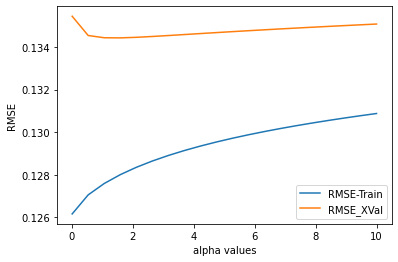

The minimum error using cross validation is: 0.13442596071022894 with alpha : 1.5873684210526318


In [435]:
ridge = Ridge()
param_values = np.linspace(.01,10,20)
train_rmse, cv_rmse = calc_params(train_x_array, train_y_array, ridge, param_values, 'alpha', 5)

The best alpha value for ridge regression appears to be 1.587. This is where the average root mean square error (rmse) is the lowest across the cross-validation (5-fold) splits, and still relatively low for the training data as well.

__Run the ridge regression model on the set aside test data with alpha = 1.587:__

In [449]:
ridge = Ridge(alpha = 1.587)
ridge.fit(train_x_array, train_y_array)

p = ridge.predict(test_x_array)
err = p - test_y_array
total_error = np.dot(err,err)
rmse = np.sqrt(total_error/len(p))

print('Ride Regression RMSE on test set: %.4f' %rmse)

Ride Regression RMSE on test set: 0.1428


__Find the optimal alpha value on training data for lasso regression:__

Lasso() Regression:
alpha  RMSE_train	 RMSE_cv

0.000	 0.1283		 0.1345
0.263	 0.2341		 0.2341
0.526	 0.2341		 0.2341
0.790	 0.2341		 0.2341
1.053	 0.2341		 0.2341
1.316	 0.2341		 0.2341
1.579	 0.2341		 0.2341
1.842	 0.2341		 0.2341
2.105	 0.2341		 0.2341
2.368	 0.2341		 0.2341
2.632	 0.2341		 0.2341
2.895	 0.2341		 0.2341
3.158	 0.2341		 0.2341
3.421	 0.2341		 0.2341
3.684	 0.2341		 0.2341
3.947	 0.2341		 0.2341
4.211	 0.2341		 0.2341
4.474	 0.2341		 0.2341
4.737	 0.2341		 0.2341
5.000	 0.2341		 0.2341


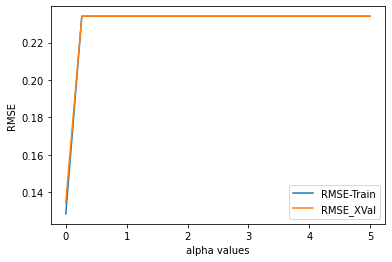

The minimum error using cross validation is: 0.1344620512370615 with alpha : 0.0001


In [437]:
lasso = Lasso()
param_values = np.linspace(.0001,5,20)
train_rmse, cv_rmse = calc_params(train_x_array, train_y_array, lasso, param_values, 'alpha', 5)

The best alpha value for lasso regression appears to be 0.0001 (basically zero).  This is where the root mean square error is lowest across the cross-validation (5-fold) splits, as well as the training data.  Essentially, what this result is saying is that lasso regression in this case produces the nearly the same coefficients as linear regression (and should perhaps not be used). A linear regression model will perform just about as well.

__Run the lasso regression model on the set aside test data with alpha = .0001:__

In [448]:
lasso = Lasso(alpha = .0001)     # setting alpha as close to zero as possible
lasso.fit(train_x_array, train_y_array)

p = lasso.predict(test_x_array)
err = p - test_y_array
total_error = np.dot(err,err)
rmse = np.sqrt(total_error/len(p))

print('Lasso Regression RMSE on test set: %.4f' %rmse)

Lasso Regression RMSE on test set: 0.1427


__Discuss Results:__

Introducing a penalty term using ridge regression (with an optimal alpha value of 1.587) resulted in a root mean square error of 0.1428 on the set aside test dataset. The root mean square error of 0.1427 achieved using lasso regression (with an optimal alpha value of .0001) was almost identical. Both of these results were worse than the root mean square error of 0.1359 achieved on the 10-fold cross-validation splits in simple linear regression (including all features).  Moreover, as the optimal alpha value for lasso regression appeared to be essentially zero, it suggests that performing regular linear regression will be just about as effective.  Indeed, by setting the optimal alpha value in lasso regression to as close to zero (.0001) as possible, the results obtained were actually worse than that of simple linear regression. 

## E: Perform regression using Stochastic Gradient Descent and grid search to optimize penalty ('l2' & 'l1') and alpha parameters: apply best parameters to SGD model on set aside test data. Perform model selection to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter; using the best mixing ratio, apply the Elastic Net model to the set-aside test data, and discuss findings:

__Standardize the data & split into training/test sets:__

In [439]:
scaler = StandardScaler()
scaler.fit(x_array)
x_std = scaler.transform(x_array)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2)

__Create grid search to compare combinations of penalty parameters ('l2', 'l1') and different values of alpha in Stochastic Gradient Descent regression model:__

In [440]:
sgd = SGDRegressor()

parameters = {'penalty': ['l2','l1'],  'alpha': [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]}

gs = GridSearchCV(sgd, parameters, verbose=1, cv=5)

__Run grid search to find best parameter values and display results:__

In [441]:
%time _ = gs.fit(x_train, y_train)

gs.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 1.86 s, sys: 13.3 ms, total: 1.88 s
Wall time: 983 ms


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


{'alpha': 0.001, 'penalty': 'l1'}

In [442]:
for (i, j) in gs.best_params_.items():
    sgd.set_params(**{i:j})
    print ("The optimal value of", i, "is:", j)
    print("\n")

The optimal value of alpha is: 0.001


The optimal value of penalty is: l1




__Run Stochastic Gradient Descent regression model with optimal penalty ('l1') & alpha (0.001) parameters on set aside test data:__

In [447]:
sgd = SGDRegressor(penalty = 'l1', alpha = 0.001)  # sdg model with 'l1' penalty & alpha = .001
sgd.fit(x_train, y_train)

p = sgd.predict(x_test)
err = p - y_test
total_error = np.dot(err,err)
rmse = np.sqrt(total_error/len(p))

print('SGD Regression RMSE on test set: %.4f' %rmse)

SGD Regression RMSE on test set: 0.1265


The root mean square error achieved for the SGD regression model using an 'l1' penalty parameter and an alpha value of .001 on the set aside test data was 0.1265. This model is performing better than the standard linear regression model including all features (with a root mean square error of 0.1359 achieved on the 10-fold cross-validation splits), the ridge regression model (with a root mean square error of 0.1428 on the set aside test data), and the lasso regression model (with a root mean square error of 0.1427 on the set aside test data).

__Model selection to find the best "l1_ratio" parameter using SGDRegressor with "elasticnet" penalty parameter:__

SGDRegressor(penalty='elasticnet') Regression:
l1_ratio  RMSE_train	 RMSE_cv

0.000	 0.1378		 0.1420
0.053	 0.1350		 0.1422
0.105	 0.1340		 0.1427
0.158	 0.1368		 0.1416
0.211	 0.1346		 0.1434
0.263	 0.1352		 0.1413
0.316	 0.1371		 0.1431
0.368	 0.1358		 0.1419
0.421	 0.1343		 0.1407
0.474	 0.1351		 0.1417
0.526	 0.1347		 0.1436
0.579	 0.1364		 0.1422
0.632	 0.1364		 0.1443
0.684	 0.1347		 0.1427
0.737	 0.1342		 0.1426
0.789	 0.1362		 0.1420
0.842	 0.1351		 0.1419
0.895	 0.1349		 0.1432
0.947	 0.1355		 0.1434
1.000	 0.1371		 0.1420


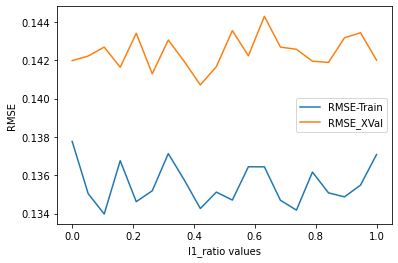

The minimum error using cross validation is: 0.14072129431404404 with l1_ratio : 0.4210684210526316


In [478]:
l1_ratio_range = np.linspace(0.0001,0.9999, 20)

sgd = SGDRegressor(penalty='elasticnet')

y_train = y_train.to_numpy()

train_rmse, cv_rmse = calc_params(x_train, y_train, sgd, l1_ratio_range, "l1_ratio", 5)

It appears that the l1_ratio value of approximately 0.421 produces the lowest cross-validation RMSE on the training data.  Using this best mixing ratio on the SGDRegressor with "elasticnet" penalty parameter, we can now run the model on the set aside test data.

__Run Stochastic Gradient Descent regression model with "elasticnet" penalty parameter and best l1 ratio value (0.421) on the set aside test data:__

In [479]:
sgd = SGDRegressor(penalty = 'elasticnet', l1_ratio = .421)  # sdg model with 'elasticnet' penalty & l1_ratio = .421
sgd.fit(x_train, y_train)

p = sgd.predict(x_test)
err = p - y_test
total_error = np.dot(err,err)
rmse = np.sqrt(total_error/len(p))

print('SGD Elastic Net Regression RMSE on test set: %.4f' %rmse)

SGD Elastic Net Regression RMSE on test set: 0.1240


__Discuss Results:__

Overall, the SGD Elastic Net model performed better than all other models tested, with a 0.1240 root mean square error achieved on the set aside test data. The root mean square errors corresponding to all models tested on the test data (or 10-fold cross validation in the case of regular linear regression) are shown below:

* Linear: 0.1359 rmse (including all features)
* Ridge: 0.1428 rmse
* Lasso: 0.1427 rmse
* SGD(L1): 0.1265 rmse 
* SGD Elastic Net: 0.1240 rmse

Since elastic net combines characteristics of both ridge and lasso regression, this is not unexpected. Based on these outcomes, it appears that SGD Elastic Net (with a mixing ratio of .421) is the best regression model for predicting per capita violent crimes (ViolentCrimesPerPop) from this data set.    